In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
transactions = pd.read_csv('../data/raw/train_transaction.csv')
print(transactions.shape)

(590540, 394)


## Columns

In [26]:
# Transaction columns: TransactionID, TransactionDT, TransactionAmt
# Product columns: ProductCD
# Cards: 6 columns
# Addresses: 2 columns
# Dist?
# Email: 2 columns
# C variables: 14 columns
# D variables: 15 columns
# M variables: 9 columns
# V variables: 339 columns

transactions.columns.tolist()

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [10]:
transactions.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD             str
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [13]:
transactions.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

## Time

In [15]:
transactions['hour'] = (transactions['TransactionDT'] // 3600) % 24
transactions['day'] = (transactions['TransactionDT'] // (3600 * 24)) % 7

/tmp/ipykernel_114601/1584168985.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transactions['hour'] = (transactions['TransactionDT'] // 3600) % 24
/tmp/ipykernel_114601/1584168985.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transactions['day'] = (transactions['TransactionDT'] // (3600 * 24)) % 7


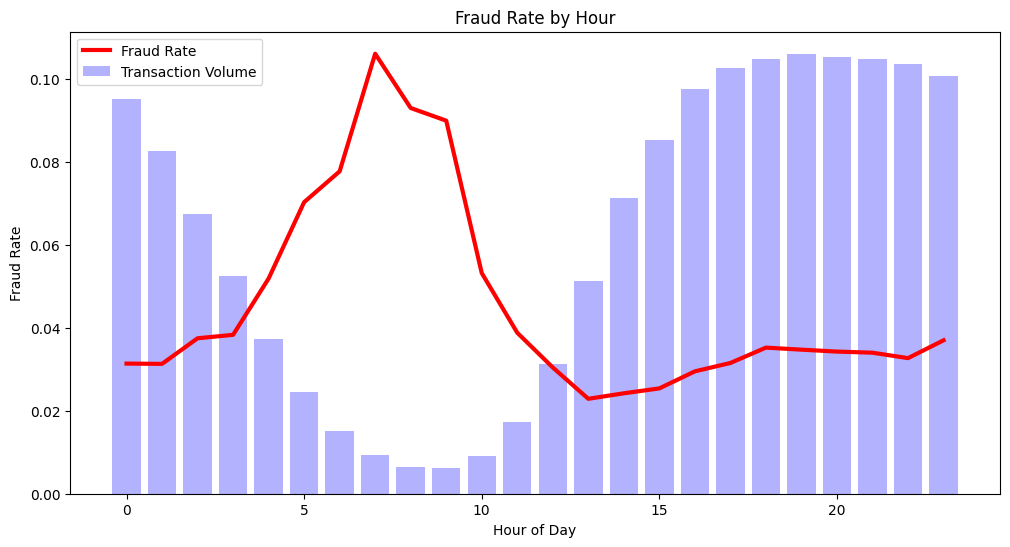

In [ ]:
# Fraud rate per hour
# The graph shows a spike between hours 3-13
# This suggests that fraudsters operate in different time zones when users are asleep
# Or that the fraud is automated to occur during nocturnal hours
plt.figure(figsize=(12, 6))

hourly_fraud = transactions.groupby('hour')['isFraud'].mean()
hourly_vol = transactions.groupby('hour')['TransactionID'].count() / transactions.groupby('hour')['TransactionID'].count().max()

plt.plot(hourly_fraud.index, hourly_fraud.values, label='Fraud Rate', color='red', linewidth=3)
plt.bar(hourly_vol.index, hourly_vol.values * hourly_fraud.max(), alpha=0.3, label='Transaction Volume', color='blue')
plt.title('Fraud Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.legend()
plt.show()

/tmp/ipykernel_114601/1492575474.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_risk.index, y=email_risk.values, palette='Reds_r')


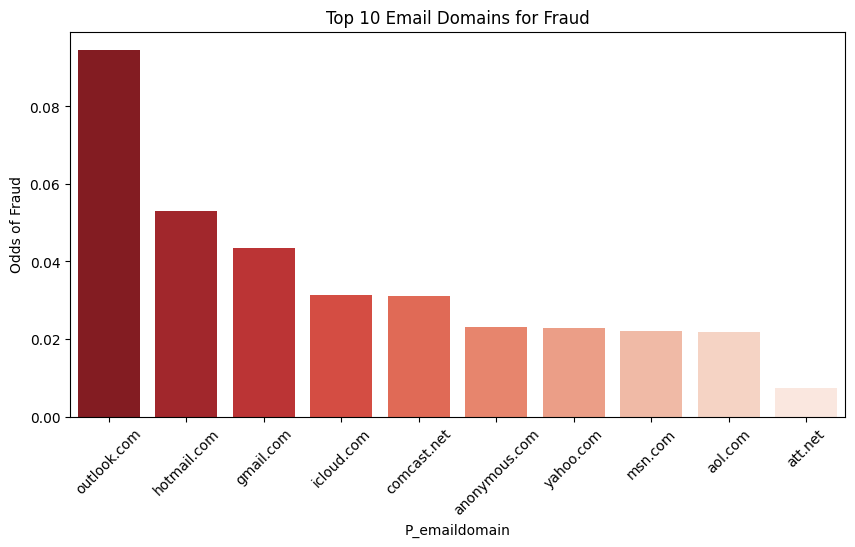

In [ ]:
# Email domain fraud
# Not surprising to see Outlook first since it's so common in the professional environments
# Hotmail and Gmail are most probably the common domains for personal emails
top_emails = transactions['P_emaildomain'].value_counts().head(10).index
email_risk = transactions[transactions['P_emaildomain'].isin(top_emails)].groupby('P_emaildomain')['isFraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=email_risk.index, y=email_risk.values, palette='Reds_r')
plt.title('Top 10 Email Domains for Fraud')
plt.ylabel('Odds of Fraud')
plt.xticks(rotation=45)
plt.show()

## Product

In [ ]:
# Product W has the lowest fraud rate but the highest fraud count and second-highest amount
# C has highest fraud rate and second-highest count
# R has highest avg amount

summary = transactions.groupby('ProductCD').agg({
    'isFraud': ['mean', 'count'],
    'TransactionAmt': 'mean'
}).sort_values(('isFraud', 'count'), ascending = False)

summary.columns = ['Fraud Rate', 'Count', 'Avg Amount']
print(summary)

           Fraud Rate   Count  Avg Amount
ProductCD                                
W            0.020399  439670  153.158554
C            0.116873   68519   42.872353
R            0.037826   37699  168.306188
H            0.047662   33024   73.170058
S            0.058996   11628   60.269487


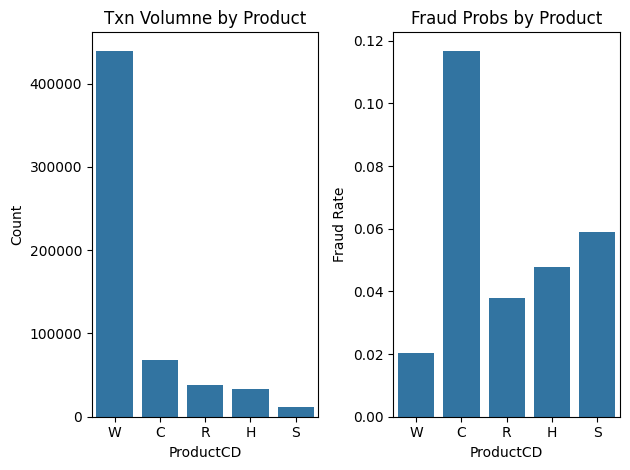

In [ ]:
# W highest volume, C highest odds of fraud
# How to evaulate this in a cost function?
# i.e. is it more financially worthwhile to minimize fraud in W or in C? How do the other products fit in here?

plt.subplot(1, 2, 1)
sns.countplot(x = 'ProductCD', data=transactions, order=summary.index)
plt.title('Txn Volumne by Product')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=summary.index, y=summary['Fraud Rate'])
plt.title('Fraud Probs by Product')
plt.ylabel('Fraud Rate')

plt.tight_layout()
plt.show()

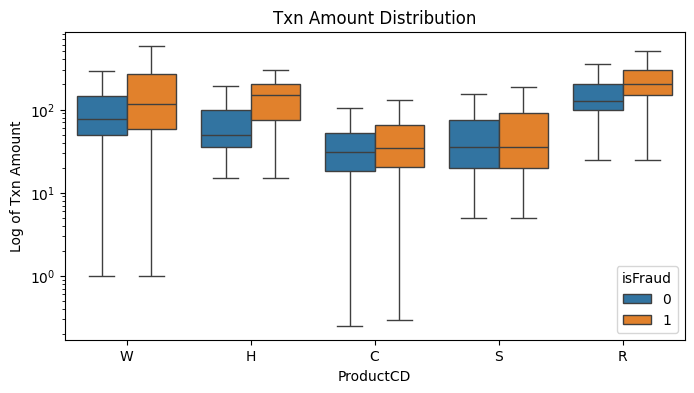

In [ ]:
# Txn amount for fraud is always marginally higher than legitimate txns.

plt.figure(figsize=(8,4))
sns.boxplot(x='ProductCD', y='TransactionAmt', hue='isFraud', data=transactions, showfliers=False)
plt.title('Txn Amount Distribution')
plt.yscale('log')
plt.ylabel('Log of Txn Amount')
plt.show()

In [ ]:
# Calculating economic impact of W vs C
# Two-thirds of total fraud happens in product W
# W, C and R represent more than 90% of all fraud
# This can allow us to follow the Pareto Principle which minimizes fraud on these three products (unless we find better options for creating a model)
 
economic_impact = transactions.groupby('ProductCD').apply(
    lambda x: pd.Series({
        'Fraud_Rate': x['isFraud'].mean(),
        'Avg_Fraud_Amt': x[x['isFraud'] == 1]['TransactionAmt'].mean(),
        'Total_Fraud_Loss': x[x['isFraud'] == 1]['TransactionAmt'].sum(),
        'Percent_of_Total_Loss': x[x['isFraud'] == 1]['TransactionAmt'].sum() / transactions[transactions['isFraud'] == 1]['TransactionAmt'].sum()
    })
).sort_values('Total_Fraud_Loss', ascending=False)

economic_impact

,Fraud_Rate,Avg_Fraud_Amt,Total_Fraud_Loss,Percent_of_Total_Loss
ProductCD,,,,
W,0.020399,229.047325,2054325.46,0.666157
C,0.116873,48.878796,391421.40,0.126926
R,0.037826,244.074334,348050.00,0.112862
H,0.047662,156.691233,246632.00,0.079975
S,0.058996,63.288630,43416.00,0.014079


## Location & Distance